1. Descripción de la arquitectura apoyándose en el artículo original.

In [1]:
# Importar las librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Definir la ruta a las imágenes
folder_path = "./Imagenes_para_exposiciones_Grupo_2"
labels = []
imagenes_list = []

for image_name in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path, image_name), target_size=(224, 224))
    label = image_name.split('_')[0]
    labels.append(label)
    imagenes_list.append(img_to_array(img))

In [3]:
# Convertir palabras a números
def palabras_a_numeros(lista_palabras):
    sorted_unique = sorted(set(lista_palabras))
    palabra_numero = {palabra: i + 1 for i, palabra in enumerate(sorted_unique)}
    return [palabra_numero[palabra] for palabra in lista_palabras]


In [4]:
# Preparar datos y etiquetas
labels = palabras_a_numeros(labels)
labels = to_categorical(labels)  # Convertir a formato one-hot
images = np.array(imagenes_list, dtype='float32')
images = preprocess_input(images)  # Preprocesamiento específico de MobileNet

In [5]:
len(labels)

100

In [6]:
labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=57)
print("x_train shape = "  ,x_train.shape)
print("y_train shape = "  ,y_train.shape)
print("\nx_test shape = " ,x_test.shape)
print("y_test shape = "   ,y_test.shape)

x_train shape =  (80, 224, 224, 3)
y_train shape =  (80, 45)

x_test shape =  (20, 224, 224, 3)
y_test shape =  (20, 45)


2. Implementación (incluyendo argumentos para iniciar el modelo con Keras)

In [8]:
# Cargar modelo MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(y_train.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compilar y entrenar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3/3 [==============================] - 19s 951ms/step - loss: 4.1909 - accuracy: 0.1125 - val_loss: 4.3161 - val_accuracy: 0.1500
Epoch 2/10
3/3 [==============================] - 1s 191ms/step - loss: 0.2887 - accuracy: 0.9500 - val_loss: 5.2581 - val_accuracy: 0.1000
Epoch 3/10
3/3 [==============================] - 1s 222ms/step - loss: 0.0735 - accuracy: 1.0000 - val_loss: 6.9683 - val_accuracy: 0.0500
Epoch 4/10
3/3 [==============================] - 1s 228ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 7.3690 - val_accuracy: 0.0500
Epoch 5/10
3/3 [==============================] - 1s 224ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 7.2261 - val_accuracy: 0.0500
Epoch 6/10
3/3 [==============================] - 1s 210ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 7.0900 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 1s 208ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 6.9353 - val_accuracy: 0.1000
Epoch 8/10
3/3 

In [10]:
# Función para visualizar las métricas de los gráficos
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Esactitud')
    plt.ylabel('accuracy')
    plt.xlabel('Epocas')
    plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Pérdida')
    plt.ylabel('Loss')
    plt.xlabel('Epocas')
    plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
    plt.show()

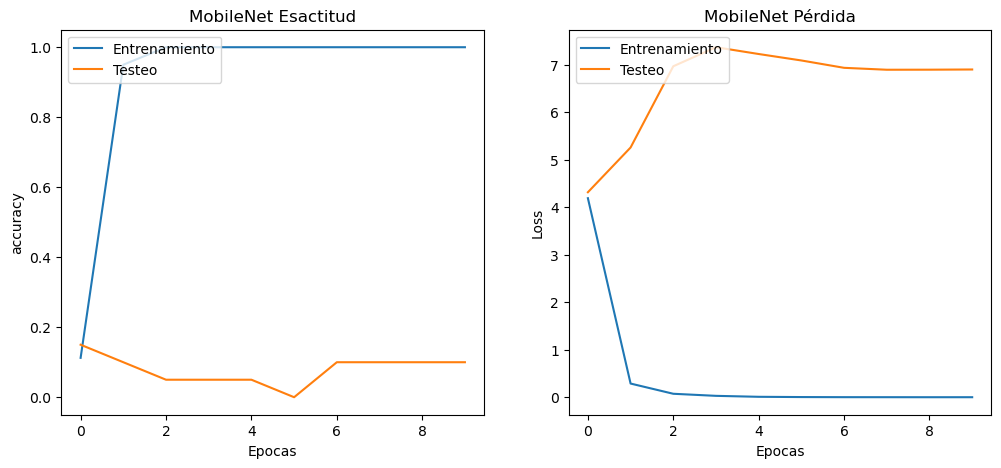

In [11]:
# Visualizar resultados del modelo
plot_history(history, 'MobileNet')

3. Aplicación del modelo en el conjunto de imágenes asignadas al grupo.
Discutir los resultados mostrando las clases presentes en sus datos.

In [12]:
# Evaluación del modelo
eval_result = model.evaluate(x_test, y_test)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

1/1 [==============================] - 0s 64ms/step - loss: 6.9002 - accuracy: 0.1000
Test Loss: 6.900242805480957, Test Accuracy: 0.10000000149011612


In [13]:
# Mostrar el sumario del modelo y hacer predicciones
model.summary()
preds = model.predict(x_test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

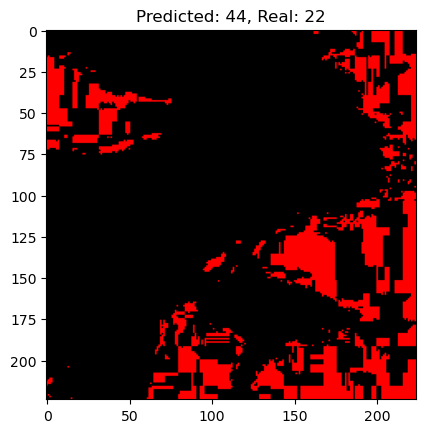

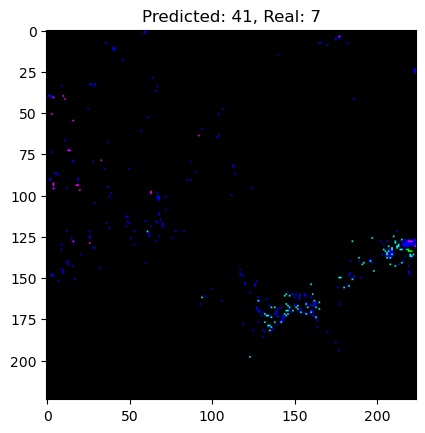

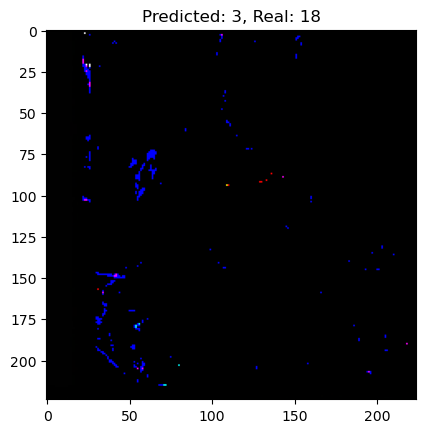

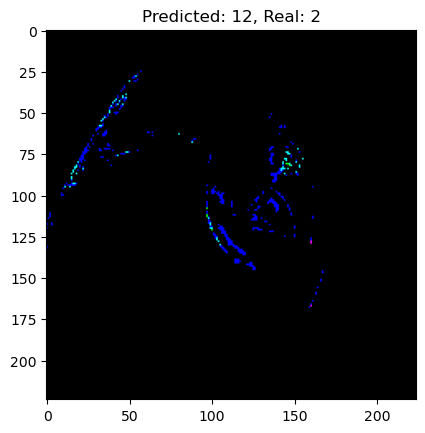

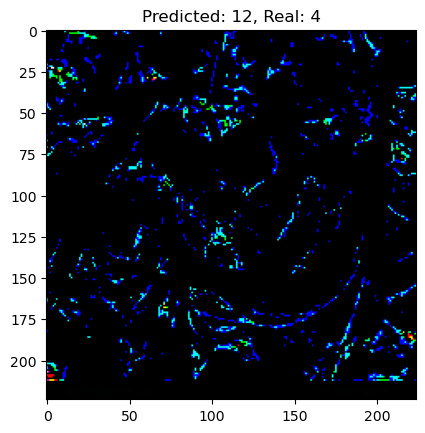

In [14]:
# Visualización de predicciones
for i, pred in enumerate(preds[:5]):
    plt.imshow(x_test[i].astype('uint8'))
    plt.title(f'Predicted: {np.argmax(pred)}, Real: {np.argmax(y_test[i])}')
    plt.show()


# MobilNet (detección de imagen)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [17]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [18]:
def prepare_image(file):
    img_path = 'Imagenes_para_exposiciones_Grupo_2/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

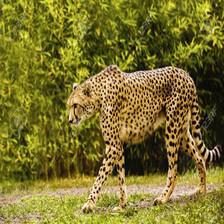

In [19]:
from IPython.display import Image
Image(filename='Imagenes_para_exposiciones_Grupo_2/acinonyx-jubatus_96_d0bb6474.jpg', width=300, height=200)

In [20]:
preprocessed_image = prepare_image('acinonyx-jubatus_96_d0bb6474.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 421ms/step


[[('n02130308', 'cheetah', 0.93088824),
  ('n02128385', 'leopard', 0.06766161),
  ('n02128925', 'jaguar', 0.0012876779),
  ('n02117135', 'hyena', 8.51546e-05),
  ('n02128757', 'snow_leopard', 3.990442e-05)]]

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# parte 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## 1. Carga y Preprocesamiento de Imágenes

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Configuración inicial
data_dir = './Imagenes_para_exposiciones_Grupo_2'  # Asegúrate de cambiar esto por la ruta correcta
image_size = (224, 224)  # Tamaño estándar para MobileNet

# Cargar y preprocesar imágenes
images = []
labels = []

for filename in os.listdir(data_dir):
    if filename.endswith(".jpg"):
        # Cargar y preparar la imagen
        img_path = os.path.join(data_dir, filename)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        img_processed = preprocess_input(img_array)
        images.append(img_processed)
        
        # Extraer la etiqueta del nombre del archivo
        label = filename.split('_')[0]
        labels.append(label)

# Convertir listas en arrays
images = np.array(images)
labels = np.array(labels)

# Codificar las etiquetas
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)


## 2. Configuración del Modelo

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet

# Cargar MobileNet preentrenado
input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output_tensor = Dense(len(np.unique(labels_encoded)), activation='softmax')(x) # Capa de salida

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

c:\Users\jsepu\miniconda3\envs\IMA543_2024_1\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## 3. Entrenamiento del Modelo

In [4]:
# Entrenar el modelo
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 11s 865ms/step - loss: 4.2196 - accuracy: 0.0312 - val_loss: 4.4566 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 110ms/step - loss: 3.6452 - accuracy: 0.1094 - val_loss: 4.4159 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 141ms/step - loss: 3.1782 - accuracy: 0.2188 - val_loss: 4.4070 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 116ms/step - loss: 2.7775 - accuracy: 0.4062 - val_loss: 4.3937 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 107ms/step - loss: 2.4326 - accuracy: 0.5469 - val_loss: 4.3649 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 135ms/step - loss: 2.1185 - accuracy: 0.6875 - val_loss: 4.3320 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 150ms/step - loss: 1.8364 - accuracy: 0.7500 - val_loss: 4.2852 - val_accuracy: 0.

In [5]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 352ms/step - loss: 3.9747 - accuracy: 0.2000
Test Accuracy: 0.20000000298023224
